In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('water.csv', index_col = 0)
df

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
...,...,...,...,...
57,South,Walsall,1527,60
58,South,West Bromwich,1627,53
59,South,West Ham,1486,122
60,South,Wolverhampton,1485,81


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


# Задание 1

Есть ли связь между жёсткостью воды и средней годовой смертностью?

Построим точечный график:

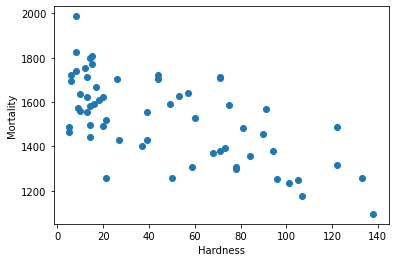

In [4]:
plt.scatter(df['hardness'], df['mortality'])
plt.xlabel('Hardness')
plt.ylabel('Mortality')
plt.show()

Рассчитаем коэффициенты корреляции Пирсона:

In [5]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


Рассчитаем коэффициенты корреляции Спирмена:

In [6]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Построим модель линейной регрессии

In [7]:
X = df[['hardness']]
Y = df['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Рассчитаем коэффициент детерминации

In [8]:
model.score(X_test, y_test)

0.5099679408034544

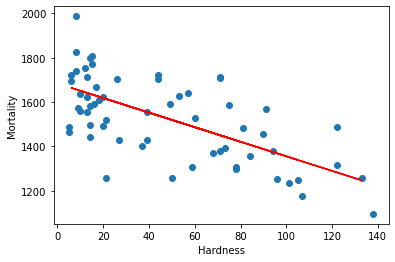

In [9]:
y_pred = model.predict(X_test)
plt.scatter(X, Y)
plt.xlabel('Hardness')
plt.ylabel('Mortality')
plt.plot(X_test, y_pred, c='r')
plt.show()

Выведем график остатков

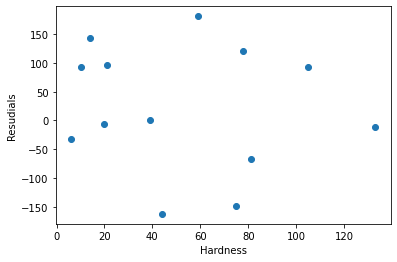

In [10]:
resid = y_pred - y_test
plt.scatter(X_test, resid)
plt.xlabel('Hardness')
plt.ylabel('Resudials')
plt.show()

## Ответ

Связь между жёсткостью воды и средней годовой смертностью есть, но несильная. Коэффициент корреляция Спирмана = 0,63.

# Задание 2

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделим данные на 2 группы

In [11]:
df_south = df[df['location'] == 'South']
df_north = df[df['location'] == 'North']

Повторим аналогичные шаги из пункта 1 для каждой группы по отдельности

In [12]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


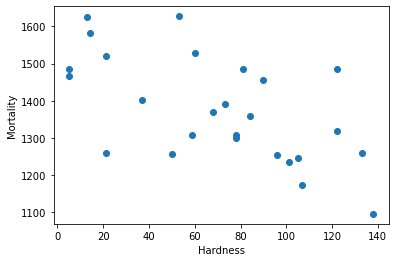

In [13]:
plt.scatter(df_south['hardness'], df_south['mortality'])
plt.xlabel('Hardness')
plt.ylabel('Mortality')
plt.show()

In [14]:
X = df_south[['hardness']]
Y = df_south['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

-1.9300174406554644

In [15]:
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


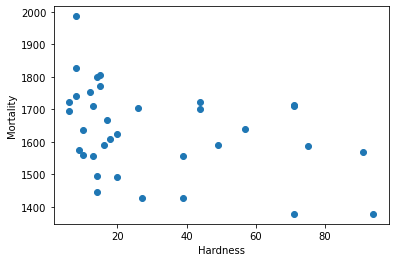

In [16]:
plt.scatter(df_north['hardness'], df_north['mortality'])
plt.xlabel('Hardness')
plt.ylabel('Mortality')
plt.show()

In [17]:
X = df_north[['hardness']]
Y = df_north['mortality']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

-0.18101539518829401

## Ответ

Связь между жёсткостью воды и средней годовой смертностью есть сохраняется, но на юге она сильнее.